# EDA and Visualization

Lets start by importing the necessary libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

! pip install plotly
import plotly.express as px

In [7]:
bin_df = pd.read_csv('data/dataframes/df_after_cols_reduction.csv').iloc[:,1:]
pca_2d_df = pd.read_csv('data/dataframes/pca_2d_df.csv').iloc[:,1:]
pca_3d_df = pd.read_csv('data/dataframes/pca_3d_df.csv').iloc[:,1:]

cat_cols = ['company_name', 'company_about','founded', 'business model','employees','product stage','status','funding stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in bin_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in bin_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in bin_df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in bin_df.columns if col.startswith("industry_")]
technology_list = [col  for col in bin_df.columns if col.startswith("technology_")]


pca_2d_cols = [col for col in pca_2d_df.columns if col not in cat_cols and col not in num_cols]
pca_3d_cols = [col for col in pca_3d_df.columns if col not in cat_cols and col not in num_cols]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [8]:
print(f'Shape of binary dataframe: {bin_df.shape}')
print(f'Shape of 2D pca dataframe: {pca_2d_df.shape}')
print(f'Shape of 3D pca dataframe: {pca_3d_df.shape}')

Shape of binary dataframe: (10070, 1927)
Shape of 2D pca dataframe: (10070, 26)
Shape of 3D pca dataframe: (10070, 32)


In [9]:
print(f'Length of tag_cols: {len(tag_cols)}')
print(f'Length of targetmarket_cols: {len(targetmarket_cols)}')
print(f'Length of sector_list: {len(sector_list)}')
print(f'Length of target_ind_list: {len(target_ind_list)}')
print(f'Length of technology_list: {len(technology_list)}')
print(f'Length of 2D pca_cols: {len(pca_2d_cols)}')
print(f'Length of 3D pca_cols: {len(pca_3d_cols)}')

Length of tag_cols: 1599
Length of targetmarket_cols: 117
Length of sector_list: 41
Length of target_ind_list: 81
Length of technology_list: 75
Length of 2D pca_cols: 12
Length of 3D pca_cols: 18


Text(0.5, 1.0, 'Succeeded vs Failed companies')

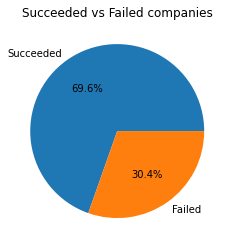

In [23]:
plt.pie(bin_df['succeeded'].value_counts(), labels=['Succeeded', 'Failed'], autopct='%1.1f%%')
plt.title('Succeeded vs Failed companies')

([<matplotlib.patches.Wedge at 0x181a3148ac0>,
 [Text(-0.5019868481820841, 0.9787794461737626, 'Active'),
  Text(0.501986848182084, -0.9787794461737627, 'Inactive')],
 [Text(-0.2738110080993185, 0.5338796979129613, '65.1%'),
  Text(0.27381100809931846, -0.5338796979129614, '34.9%')])

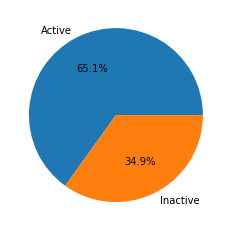

In [24]:
plt.pie(bin_df['status'].value_counts(), labels=['Active', 'Inactive'], autopct='%1.1f%%')
plt.title('Active vs Not active companies')

Text(0.5, 1.0, 'Employees')

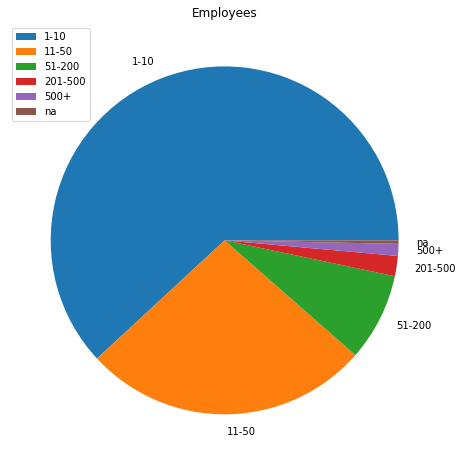

In [39]:
fig = plt.figure(figsize=(8,8))
plt.pie(bin_df['employees'].value_counts(), labels=['1-10', '11-50', '51-200', '201-500', '500+', 'na' ])
plt.legend(loc = 'upper left')
plt.title('Employees')


Text(0.5, 1.0, 'Business Model')

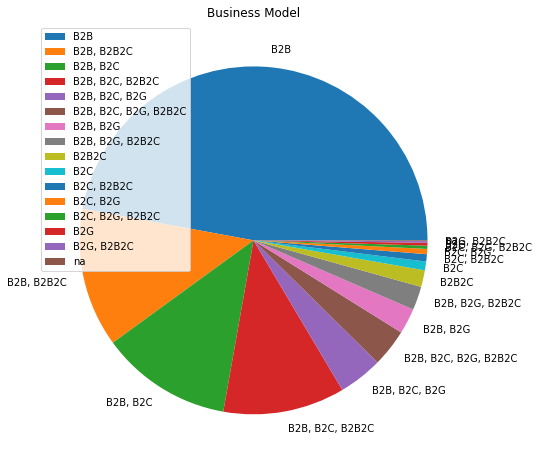

In [40]:
fig = plt.figure(figsize=(8,8))
mylabels = ['B2B', 'B2B, B2B2C', 'B2B, B2C', 'B2B, B2C, B2B2C', 'B2B, B2C, B2G',
 'B2B, B2C, B2G, B2B2C', 'B2B, B2G', 'B2B, B2G, B2B2C', 'B2B2C', 'B2C',
 'B2C, B2B2C', 'B2C, B2G', 'B2C, B2G, B2B2C', 'B2G', 'B2G, B2B2C', 'na']
plt.pie(bin_df['business model'].value_counts(), labels=mylabels)
plt.legend(loc = 'best')
plt.title('Business Model')

Text(0.5, 1.0, 'Product Stage')

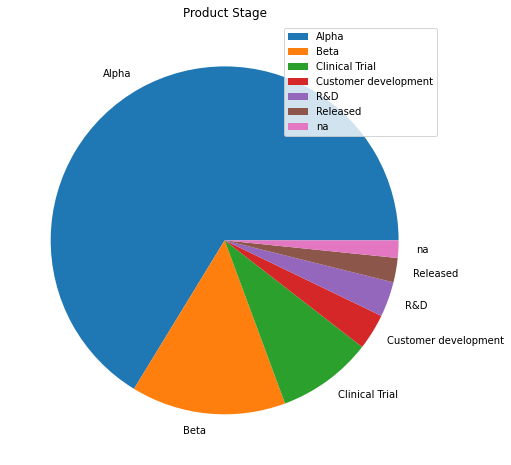

In [41]:
fig = plt.figure(figsize=(8,8))
mylabels = ['Alpha', 'Beta', 'Clinical Trial', 'Customer development', 'R&D', 'Released',
 'na']
plt.pie(bin_df['product stage'].value_counts(), labels=mylabels)
plt.legend(loc = 'best')
plt.title('Product Stage')

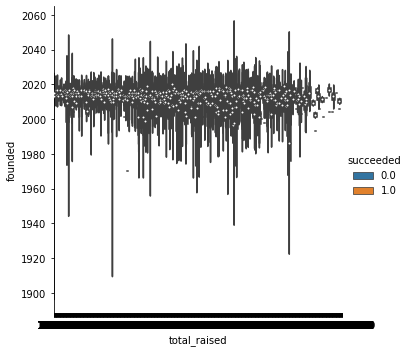

In [11]:
# bin_df[bin_df.succeeded == 1]

sns.catplot(x="total_raised", y="founded", hue="succeeded", kind="violin", data=pca_2d_df)

In [17]:
fig = px.imshow(pca_3d_df[pca_3d_cols].corr())
fig.show()

KeyboardInterrupt: 

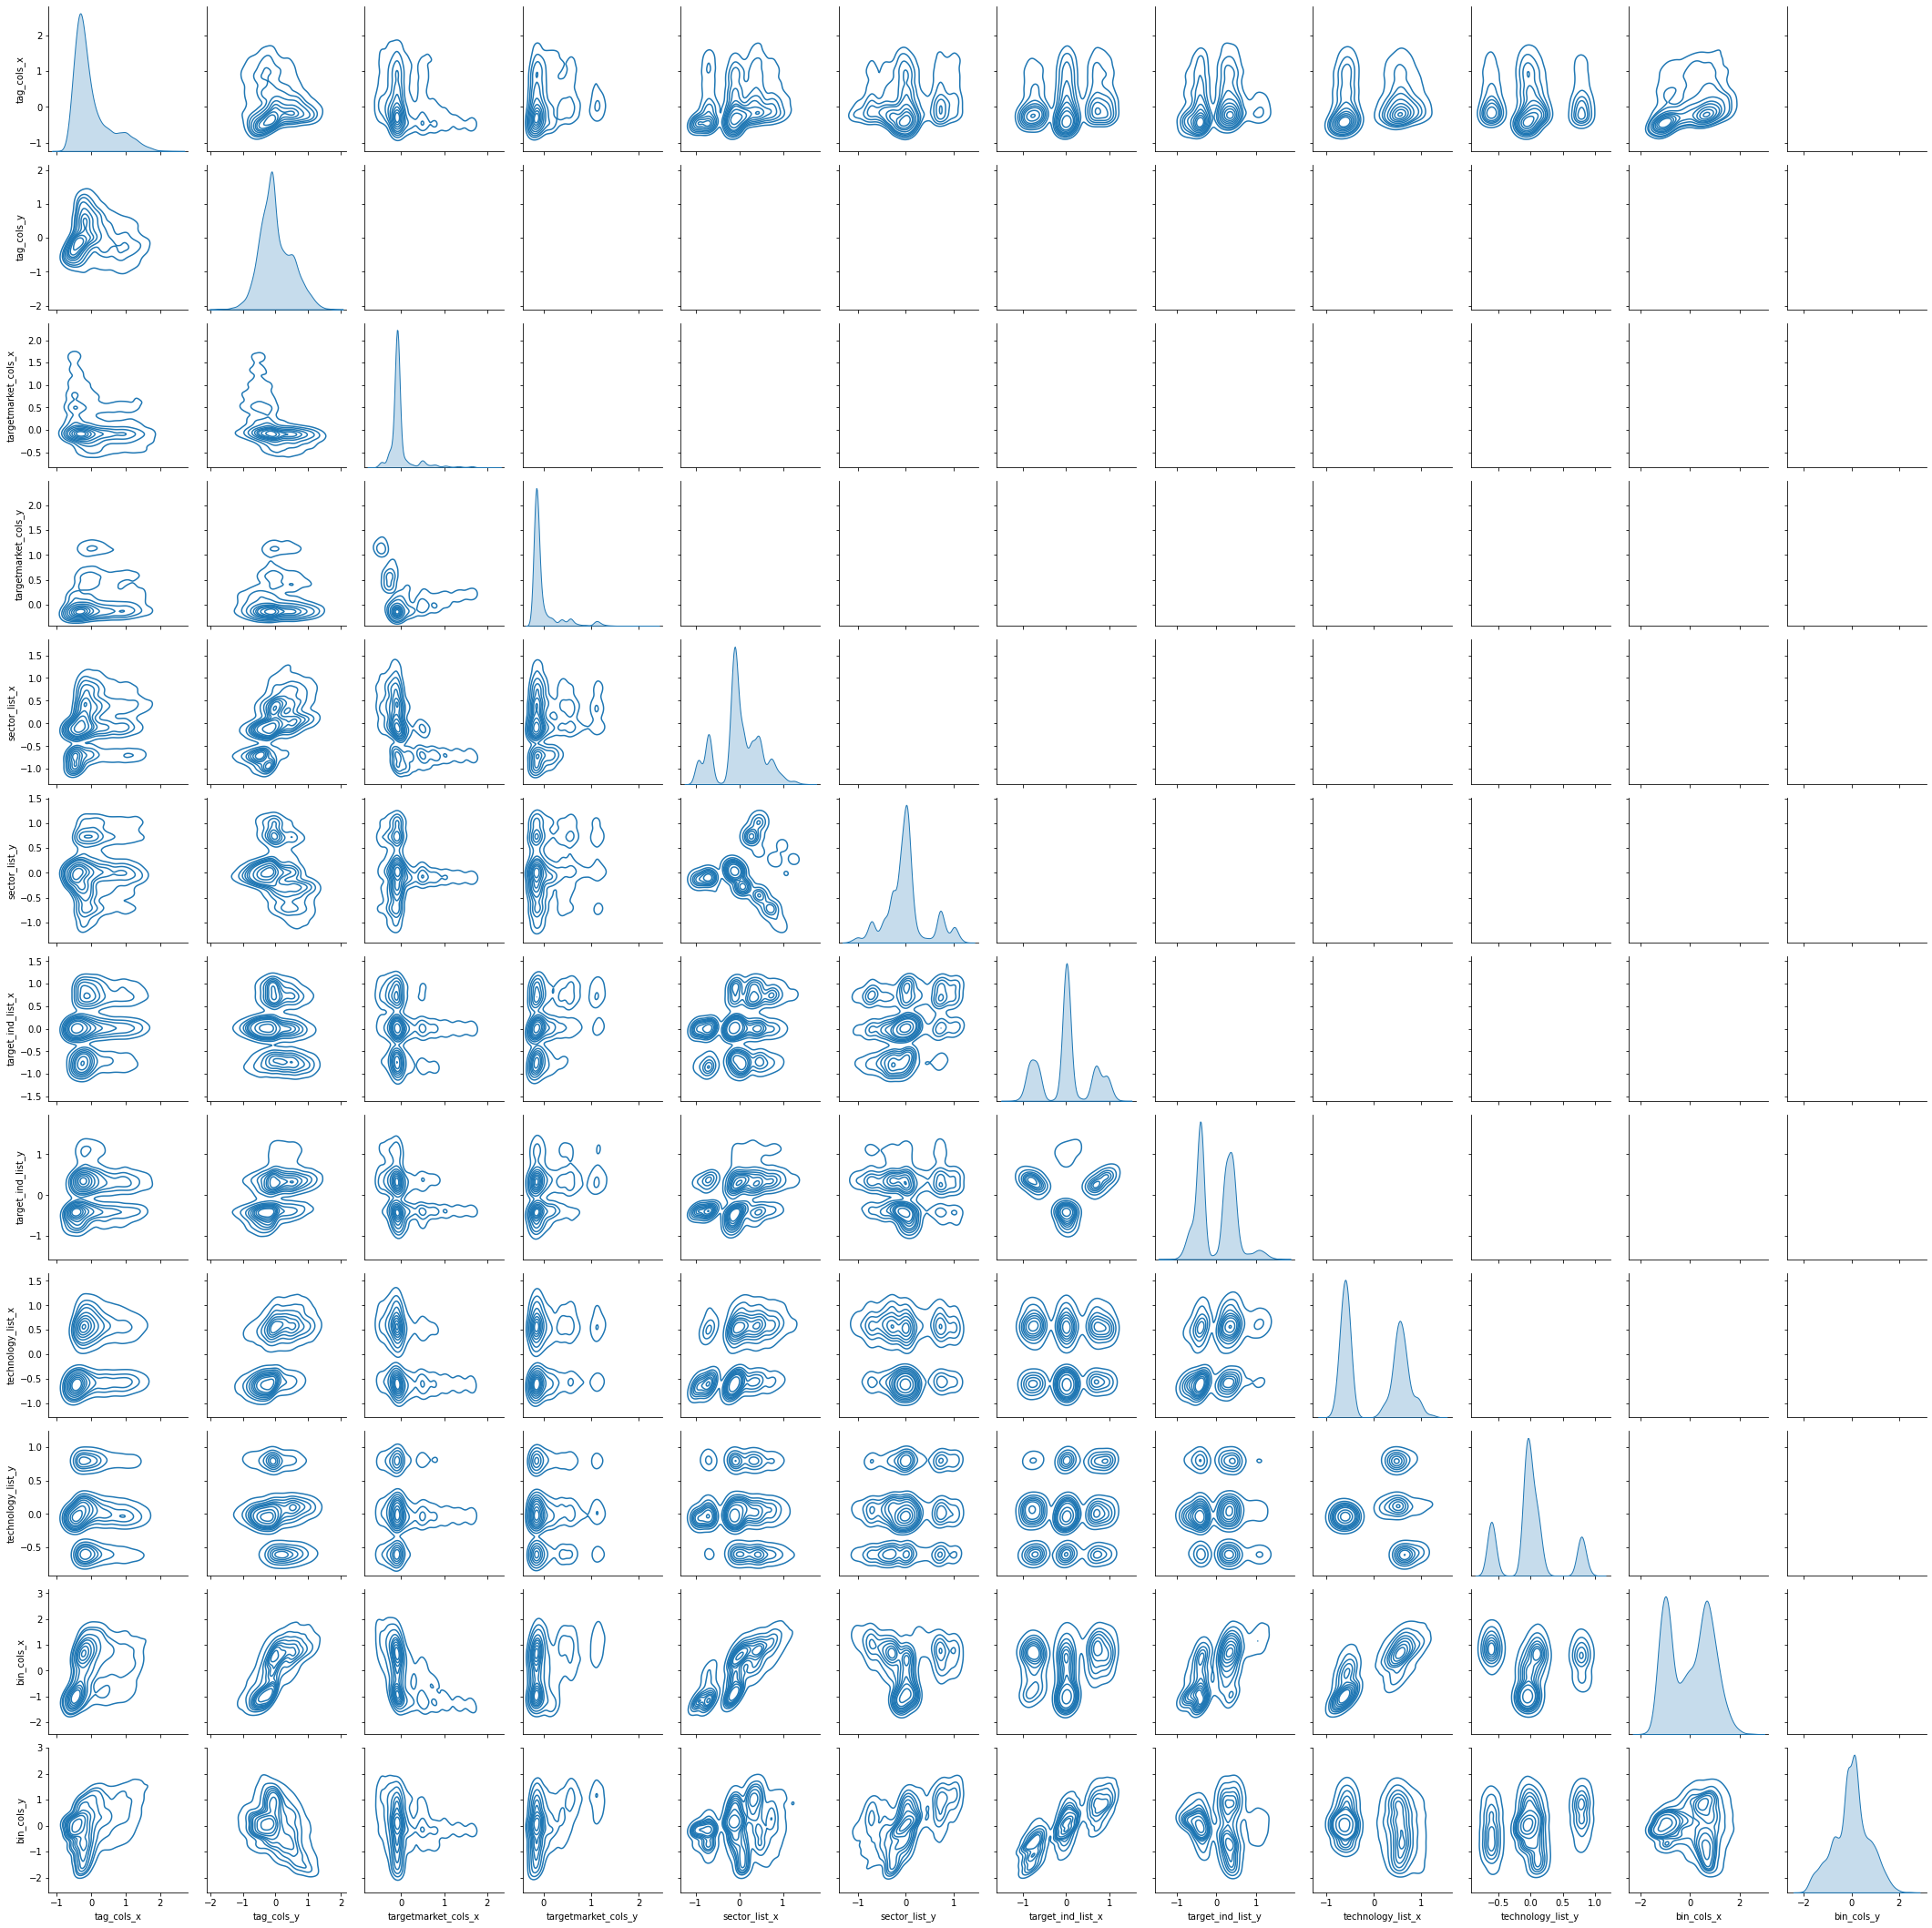

In [30]:
# rs = np.random.RandomState(0)
# df2 = pd.DataFrame(rs.rand(10, 10))
sns.pairplot(pca_df[pca_cols], kind='kde')